The goal of this project is to demonstrate the application of K-Means clustering for image segmentation. Specifically, you aim to:

- Segment an Image: Use K-Means clustering to segment an image of a ladybug into different regions based on color similarity.

- Visualize Different Color Quantizations: Compare the effectiveness of various numbers of color clusters (2, 4, 6, 8, and 10 clusters) on image segmentation. Evaluate how the number of clusters affects the visual quality of the segmented image.

- Understand Clustering Impact: Assess how the number of color clusters impacts the representation of the original image, and analyze the trade-offs between image detail and cluster count.

- Present Results: Visualize and present the original image alongside its segmented versions to highlight the changes and differences brought about by different clustering configurations.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

In [17]:
# Load the image
file_path = r'D:\Machine learning\Workbook\K-Means Clustering\Image Detection\Color-Splash-PNG-HD-Isolated.png'
image = imread(file_path)

In [18]:
image.shape

(800, 782, 4)

In [23]:
# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 4)
X

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [20]:
# Segment the image with different number of clusters
segmented_imgs = []
n_colors = (5, 4, 3)

In [21]:
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00023445487..0.99838626].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00012215972..0.9938187].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00010231137..0.99174815].


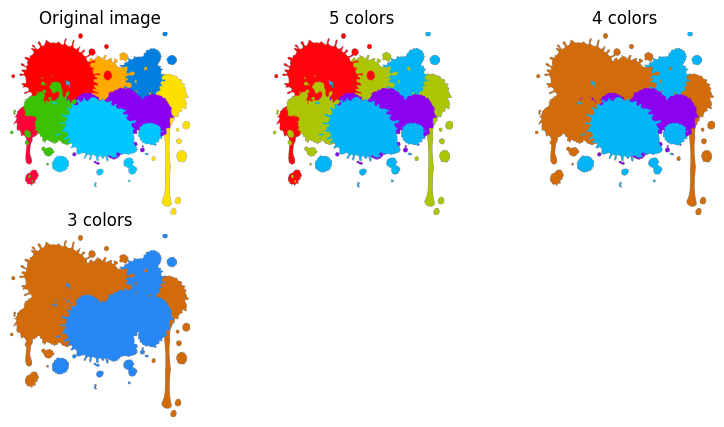

In [22]:
# Plot the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# Original image
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

# Segmented images
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()